<a href="https://colab.research.google.com/github/Heleneq20/Python-Programming-for-Business-Analytics/blob/main/Python_course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [ ]:
# Dataset
data = [
    {"InvoiceNo": "536365", "StockCode": "85123A", "Description": "WHITE HANGING HEART T-LIGHT HOLDER", "Quantity": 6, "InvoiceDate": "01/12/2010 08:26", "UnitPrice": 2.55, "CustomerID": 17850, "Country": "United Kingdom"},
    {"InvoiceNo": "536365", "StockCode": "71053", "Description": "WHITE METAL LANTERN", "Quantity": 6, "InvoiceDate": "01/12/2010 08:26", "UnitPrice": 3.39, "CustomerID": 17850, "Country": "United Kingdom"},
    {"InvoiceNo": "536365", "StockCode": "84406B", "Description": "CREAM CUPID HEARTS COAT HANGER", "Quantity": 8, "InvoiceDate": "01/12/2010 08:26", "UnitPrice": 2.75, "CustomerID": 17850, "Country": "United Kingdom"}
]

# Calculate Total Revenue
total_revenue = 0  # Initialize total_revenue outside the loop
for record in data:
    total_revenue += float(record["Quantity"] * record["UnitPrice"]) # Accumulate revenue for each record

# Print Total Revenue
print(f"The total revenue is {total_revenue}")



The total revenue is 57.64


In [ ]:
# we want to look for total revenue >0$ and <30$
total_revenue = 0
for record in data:
    total_revenue += float(record["Quantity"] * record["UnitPrice"])
    if 0 < total_revenue < 30:
        print(f"The total revenue is between 0$ to 30$")
    else:
        print(f"The total revenue is over 30$")


The total revenue is between 0$ to 30$
The total revenue is over 30$
The total revenue is over 30$


In [ ]:
# Initialize total revenue
total_revenue = 0

# Loop through each record and calculate the total revenue
for record in data:
    total_revenue += float(record["Quantity"] * record["UnitPrice"])

# Check if the total revenue is between 0 and 30
if 0 < total_revenue < 30:
    print(f"The total revenue is between 0$ and 30$")
else:
    print(f"The total revenue is over 30$")


The total revenue is over 30$


In [ ]:
import pandas as pd
retail_df= pd.read_excel("/content/drive/MyDrive/data/Online Retail.xlsx")

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print(retail_df.isnull().sum()) #we want to check if there are missing data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
print(retail_df.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [ ]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
# Remove the 'box' argument and add errors='coerce' to handle parsing errors

In [ ]:
retail_df['Description'] = retail_df['Description'].str.replace('.','').str.upper().str.strip()
retail_df['Description'] = retail_df['Description'].replace('\s+',' ',regex = True)
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str).str.upper()
retail_df['StockCode'] = retail_df['StockCode'].str.upper()
retail_df['Country'] = retail_df['Country'].str.upper()
retail_df['CustomerID'] = pd.to_numeric(retail_df['CustomerID'], errors='coerce').fillna(0).astype(int)

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,NaN,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM


In [ ]:
#List non usable StockCodes
wrong = retail_df['StockCode'].unique()
# Convert all elements in 'wrong' to strings before sorting
wrong = [str(item) for item in wrong]
wrong.sort()
print('Unusable StockCode: \n',wrong[::-1][:4])

Unusable StockCode: 
 ['nan', 'S', 'POST', 'PADS']


In [ ]:
#We want to drop the stockcodes that contains only strings
retail_df['StockCode'] = retail_df['StockCode'].astype(str)
CodeTypes = list(map(lambda codes: any(char.isdigit() for char in codes), retail_df['StockCode']))
WrongCodes = [i for i,v in enumerate(CodeTypes) if v == False]
retail_df.drop(WrongCodes , inplace = True)


In [ ]:
# Create a mapping of StockCode to Description
stockcode_descriptions = retail_df.dropna(subset=['Description']).drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']].set_index('StockCode')['Description'].to_dict()

# Fill missing descriptions
retail_df['Description'] = retail_df['StockCode'].map(stockcode_descriptions).fillna(retail_df['Description'])

In [ ]:
#There are some customers that are associated with 2 different countries
Customers = retail_df.groupby('CustomerID')['Country'].unique()
Customers.loc[Customers.apply(lambda x:len(x)>1)]
print(Customers)


CustomerID
0        [UNITED KINGDOM, EIRE, BAHRAIN, HONG KONG, UNS...
12347                                            [ICELAND]
12349                                              [ITALY]
12350                                             [NORWAY]
12352                                             [NORWAY]
                               ...                        
18273                                     [UNITED KINGDOM]
18274                                     [UNITED KINGDOM]
18277                                     [UNITED KINGDOM]
18283                                     [UNITED KINGDOM]
18287                                     [UNITED KINGDOM]
Name: Country, Length: 3295, dtype: object


In [ ]:
print(retail_df.isnull().sum())

InvoiceNo       0
StockCode       0
Description    49
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64


In [ ]:
# There are still missing values, let's replace them with "Unknown"
retail_df['Description'] = retail_df['Description'].fillna("Unknown")
print(retail_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
#let's look for duplicates
retail_df.duplicated().sum()


380

In [ ]:
retail_df = retail_df.drop_duplicates()
retail_df.duplicated().sum()


0

In [ ]:
#some of these transactions contains returned products and in those transaction the 'InvoiceNo' contains a 'c' character in the beginning and the 'UnitPrice' should have a negative value

retail_df.drop(retail_df[(retail_df.Quantity>0) & (retail_df.InvoiceNo.str.contains('C') == True)].index, inplace=True)
retail_df.drop(retail_df[(retail_df.Quantity<0) & (retail_df.InvoiceNo.str.contains('C') == False)].index, inplace=True)
retail_df.drop(retail_df[retail_df.Description.str.contains('?', regex=False) == True].index, inplace=True)
retail_df.drop(retail_df[retail_df.UnitPrice == 0].index, inplace=True)



In [ ]:
print(retail_df["Country"].unique())  # List all unique countries


['UNITED KINGDOM' 'AUSTRALIA' 'GERMANY' 'EIRE' 'FRANCE' 'ITALY' 'BELGIUM'
 'LITHUANIA' 'JAPAN' 'ICELAND' 'PORTUGAL' 'CHANNEL ISLANDS' 'SPAIN'
 'CYPRUS' 'SWEDEN' 'NETHERLANDS' 'BAHRAIN' 'POLAND' 'SWITZERLAND'
 'FINLAND' 'GREECE' 'HONG KONG' 'SINGAPORE' 'LEBANON' 'AUSTRIA' 'NORWAY'
 'UNITED ARAB EMIRATES' 'CZECH REPUBLIC' 'CANADA' 'BRAZIL' 'USA'
 'UNSPECIFIED' 'DENMARK' 'MALTA' 'EUROPEAN COMMUNITY' 'ISRAEL' 'RSA']


In [ ]:
regions = {
    'AMERICAS': [
        'USA', 'CANADA', 'BRAZIL', 'ARGENTINA', 'MEXICO', 'CHILE'
    ],
    'EMEA': [
        'UNITED KINGDOM', 'FRANCE', 'NETHERLANDS', 'GERMANY', 'NORWAY',
        'EIRE', 'SWITZERLAND', 'SPAIN', 'POLAND', 'PORTUGAL', 'ITALY', 'BELGIUM',
        'LITHUANIA', 'ICELAND', 'CHANNEL ISLANDS', 'DENMARK', 'CYPRUS', 'SWEDEN',
        'FINLAND', 'AUSTRIA', 'BAHRAIN', 'ISRAEL', 'GREECE', 'EUROPEAN COMMUNITY',
        'MALTA','RSA','SAUDI ARABIA', 'LEBANON', 'UNITED ARAB EMIRATES','CZECH REPUBLIC'
    ],
    'ASIA': [
        'JAPAN', 'HONG KONG', 'SINGAPORE', 'CHINA', 'INDIA', 'INDONESIA', 'SOUTH KOREA'
    ],
    'OTHER': ['UNSPECIFIED', 'AUSTRALIA' ]
}


In [ ]:
def assign_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Unknown'  # Retourns 'Unknown' if the country isn't found

# Add 'Region' column

retail_df['Region'] = retail_df['Country'].apply(assign_region)

In [ ]:
print(retail_df[['Country','Region']])

               Country Region
0       UNITED KINGDOM   EMEA
2       UNITED KINGDOM   EMEA
3       UNITED KINGDOM   EMEA
4       UNITED KINGDOM   EMEA
49      UNITED KINGDOM   EMEA
...                ...    ...
541778         GERMANY   EMEA
541809  UNITED KINGDOM   EMEA
541838  UNITED KINGDOM   EMEA
541844  UNITED KINGDOM   EMEA
541853  UNITED KINGDOM   EMEA

[51085 rows x 2 columns]


In [ ]:
retail_df_emea = retail_df[retail_df["Region"] == "EMEA"]
print(retail_df_emea)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E        RED WOOLLY HOTTIE WHITE HEART         6   
49        536373    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
...          ...       ...                                  ...       ...   
541778    581578    84997C    BLUE 3 PIECE POLKADOT CUTLERY SET         8   
541809    581579    85099C        JUMBO BAG BAROQUE BLACK WHITE        10   
541838    581580    84993A            75 GREEN PETIT FOUR CASES         2   
541844    581580    85049A        TRADITIONAL CHRISTMAS RIBBONS         1   
541853    581580    85049E            SCANDINAVIAN REDS RIBBONS         2   

               InvoiceDate  UnitPrice  CustomerID         Country Region  


In [ ]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])  # Ensure correct format
retail_df_december = retail_df[
    (retail_df["InvoiceDate"] >= "2010-12-01") & (retail_df["InvoiceDate"] < "2011-01-01")
]
print(retail_df_december)

      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E        RED WOOLLY HOTTIE WHITE HEART         6   
49       536373    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
...         ...       ...                                  ...       ...   
42449    539988    84849D                HOT BATHS SOAP HOLDER         1   
42450    539988    84849B               FAIRY SOAP SOAP HOLDER         1   
42452    539988    47559B                  TEA TIME OVEN GLOVE         2   
42461    539990    85071B   RED CHARLIE+LOLA PERSONAL DOORSIGN         1   
42465    539991    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         1   

              InvoiceDate  UnitPrice  CustomerID         Country Region  
0     2010-12

In [ ]:
retail_df["Year"] = retail_df["InvoiceDate"].dt.year
retail_df["Month"] = retail_df["InvoiceDate"].dt.month
retail_df["Day"] = retail_df["InvoiceDate"].dt.day

In [ ]:
transactions_per_year = retail_df.groupby("Year")["InvoiceNo"].nunique().reset_index()
transactions_per_year.columns = ["Year", "TransactionCount"]
print(transactions_per_year)

   Year  TransactionCount
0  2010               976
1  2011             10836


In [ ]:
transactions_per_month = retail_df.groupby(["Year", "Month"])["InvoiceNo"].nunique().reset_index()
transactions_per_month.columns = ["Year", "Month", "TransactionCount"]
print(transactions_per_month)

    Year  Month  TransactionCount
0   2010     12               976
1   2011      1               762
2   2011      2               731
3   2011      3               931
4   2011      4               776
5   2011      5               928
6   2011      6               880
7   2011      7               892
8   2011      8               831
9   2011      9              1050
10  2011     10              1136
11  2011     11              1494
12  2011     12               425


In [ ]:
#let's sort by total sales by region (desc)
retail_df["TotalSales"] = retail_df["Quantity"] * retail_df["UnitPrice"]
region_sales = retail_df.groupby('Region')['TotalSales'].sum().reset_index()
region_sales_sorted = region_sales.sort_values(by="TotalSales", ascending=False)
print(region_sales_sorted)

     Region  TotalSales
2      EMEA   874095.11
3     OTHER     4392.28
1      ASIA     3258.81
0  AMERICAS      614.33


In [ ]:
#Top 5 best selling products
retail_df_top_products = retail_df.groupby("Description")["Quantity"].sum().reset_index()
retail_df_top_products = retail_df_top_products.sort_values(by="Quantity", ascending=False).head(5)
print(retail_df_top_products)

                            Description  Quantity
438             JUMBO BAG RED RETROSPOT     47256
873  WHITE HANGING HEART T-LIGHT HOLDER     35355
439                JUMBO BAG STRAWBERRY     17033
437       JUMBO BAG BAROQUE BLACK WHITE     13619
414   HANGING HEART ZINC T-LIGHT HOLDER      9092


In [ ]:
#total sales calculations
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"] # assign the calculated total sales to a new column 'TotalPrice'
total_sales = retail_df["TotalPrice"] # Assign the "TotalPrice" column
print(total_sales)

0         15.30
2         22.00
3         20.34
4         20.34
49        15.30
          ...  
541778    33.20
541809    17.90
541838     0.84
541844     1.25
541853     2.50
Name: TotalPrice, Length: 51085, dtype: float64


In [ ]:
total_quantity = retail_df["Quantity"].sum()
print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 433343


In [ ]:
#average order value
average_order_value = retail_df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"Average Order Value: {average_order_value:.2f}")


Average Order Value: 74.70


In [ ]:
#average price per product
average_price_per_product = retail_df.groupby("StockCode")["UnitPrice"].mean()
average_price_per_product_sorted = average_price_per_product.sort_values(ascending=False)
print(average_price_per_product_sorted.head())


StockCode
84963B          49.950000
C2              49.636364
84078A          44.850307
84963A          42.950000
GIFT_0001_50    41.890000
Name: UnitPrice, dtype: float64


In [ ]:
# Calculate total transactions
total_transactions = retail_df['InvoiceNo'].nunique()

# Group by country and count transactions
transactions_per_country = retail_df.groupby('Country')['InvoiceNo'].nunique().reset_index()

# Calculate percentage
transactions_per_country['Percentage'] = (transactions_per_country['InvoiceNo'] / total_transactions) * 100

# Sort by percentage in descending order
transactions_per_country = transactions_per_country.sort_values(by='Percentage', ascending=False)

# Display the result
print(transactions_per_country[['Country', 'Percentage']])

                 Country  Percentage
34        UNITED KINGDOM   90.772096
14               GERMANY    1.921774
10                  EIRE    1.913308
13                FRANCE    1.549272
30                 SPAIN    0.465628
3                BELGIUM    0.440230
24           NETHERLANDS    0.389434
32           SWITZERLAND    0.287843
27              PORTUGAL    0.262445
12               FINLAND    0.253979
0              AUSTRALIA    0.228581
19                 ITALY    0.177785
25                NORWAY    0.143921
6        CHANNEL ISLANDS    0.135455
7                 CYPRUS    0.118524
26                POLAND    0.110058
31                SWEDEN    0.093126
9                DENMARK    0.093126
1                AUSTRIA    0.093126
23                 MALTA    0.059262
35           UNSPECIFIED    0.059262
17               ICELAND    0.059262
36                   USA    0.050796
20                 JAPAN    0.050796
16             HONG KONG    0.042330
29             SINGAPORE    0.033864
1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

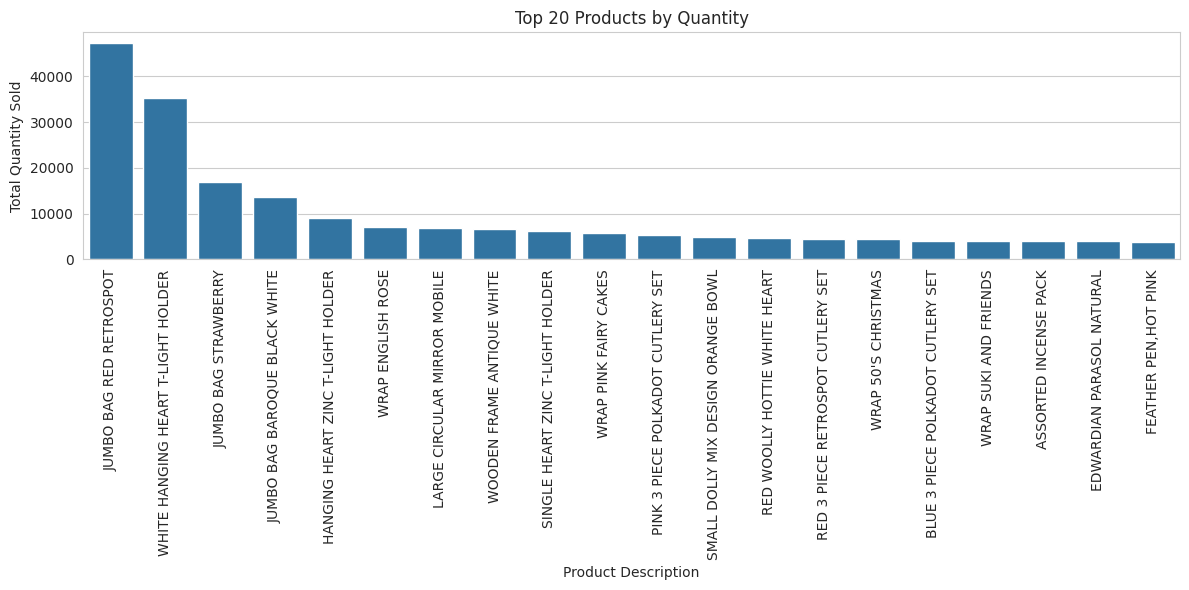

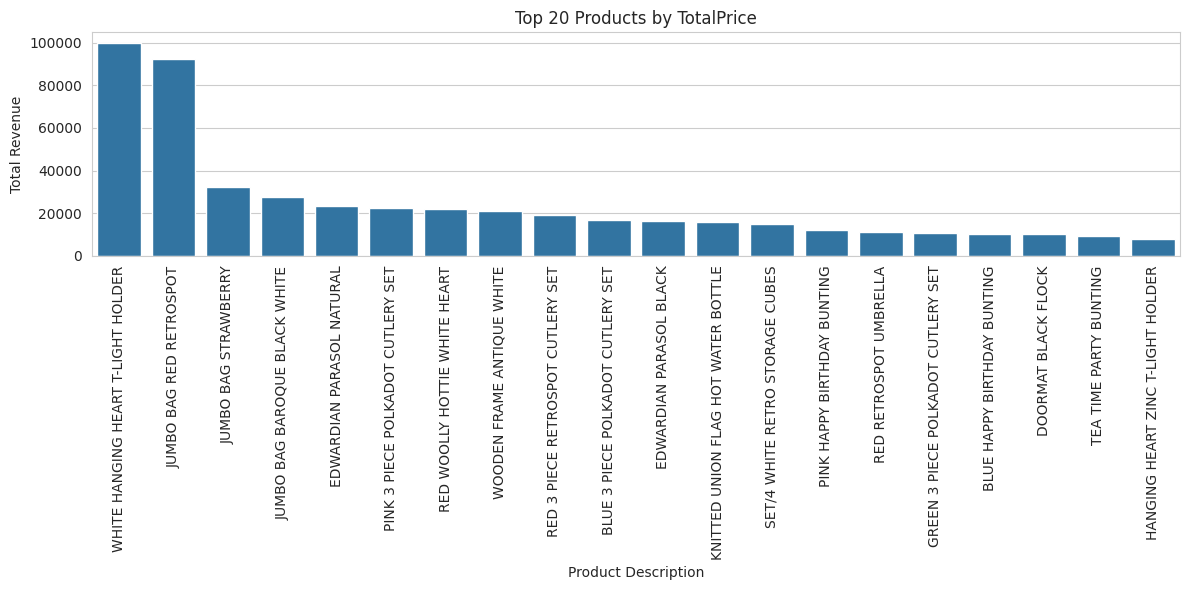

In [ ]:
sns.set_style('whitegrid')

Top20Quantity = retail_df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = retail_df.groupby('Description')["TotalPrice"].agg('sum').sort_values(ascending=False)[0:20]

# Create a bar chart for Quantity
plt.figure(figsize=(12, 6))
sns.barplot(x=Top20Quantity.index, y=Top20Quantity.values)
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.title("Top 20 Products by Quantity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create a subplot for TotalPrice
plt.figure(figsize=(12, 6))
sns.barplot(x=Top20Price.index, y=Top20Price.values)
plt.xlabel("Product Description")
plt.ylabel("Total Revenue")
plt.title("Top 20 Products by TotalPrice")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

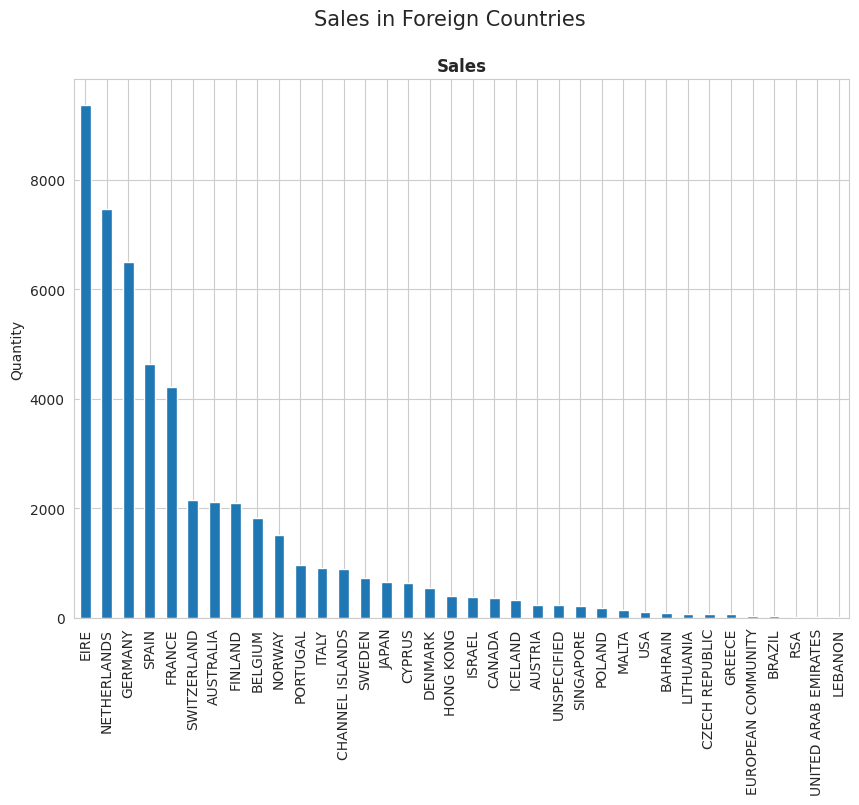

In [ ]:

# Grouping data by the countries (except UK)
ByCountrySale = retail_df[(retail_df['Country'] != 'UNITED KINGDOM') & (retail_df['Quantity'] > 0)]\
    .groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Creating the subplot (only one axis since returns are not included)
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot sales
ByCountrySale.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Quantity')
ax1.set_xlabel('')
ax1.set_title('Sales', size=12, fontweight='bold')

# Set main title
plt.suptitle('Sales in Foreign Countries', fontsize=15)
plt.subplots_adjust(hspace=0.6)

plt.show()




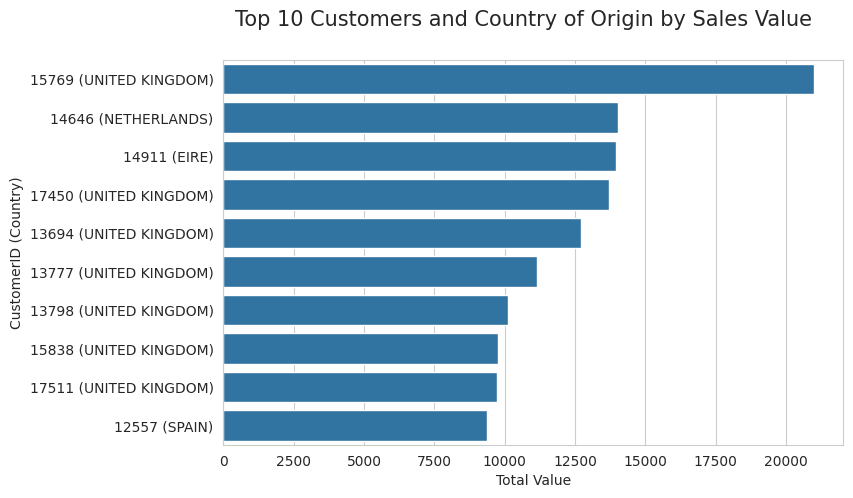

In [ ]:
# Filtering top 10 customers by total TotalPrice, excluding CustomerID = 0
Top10Customers = retail_df[retail_df['CustomerID'] != 0] \
    .groupby(['CustomerID', 'Country'])['TotalPrice'].sum() \
    .sort_values(ascending=False).head(10)  # Using head(10) for better readability

# Convert the MultiIndex to a list of combined strings for the y-axis labels
y_labels = [f'{customer} ({country})' for customer, country in Top10Customers.index]

# Creating the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=Top10Customers.values, y=y_labels)\
    .set(xlabel='Total Value', ylabel='CustomerID (Country)')

# Set main title
plt.suptitle('Top 10 Customers and Country of Origin by Sales Value', fontsize=15)

plt.show()


In [ ]:

# Assuming retail_df is your DataFrame
retail_df.to_excel("/content/drive/MyDrive/data/retail_data.xlsx", index=False) # Add a filename and extension

In [ ]:
!pip install sqlalchemy --quiet

In [ ]:
# current working directory
import os
os.getcwd()

'/content'

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Load your data into a pandas DataFrame
retail_df = pd.read_excel('/content/drive/MyDrive/data/retail_data.xlsx')


engine = create_engine('sqlite:///retail_data.db')



In [ ]:
from sqlalchemy import Table, Column, Integer, String, MetaData, DateTime, Float # Import DateTime and Float

# Define metadata to hold table definitions.
metadata = MetaData()

sales = Table(
    "sales", metadata,
    Column("InvoiceNo", Integer, primary_key=True),
    Column("StockCode", Integer),
    Column("Description", String),
    Column("Quantity", Integer),
    Column("InvoiceDate", DateTime),
    Column("UnitPrice", Float),
    Column("CustomerID", Integer),
    Column("Country", String),
    Column("Region", String),
    Column("Year", Integer),
    Column("Month", Integer),
    Column("Day", Integer),
    Column("TotalPrice", Float)
)
metadata.create_all(engine)





In [ ]:
#insert data in the database
retail_df.to_sql('sales', con=engine, if_exists='replace', index=False)

51085

In [ ]:
from sqlalchemy import insert, select # Import the 'select' function

# Select all columns from 'sales'
stmt = select(sales)  # Use the 'sales' Table object, not a string
with engine.connect() as conn:
    results = conn.execute(stmt)
    retail_df = pd.DataFrame(results.fetchall(), columns=results.keys())

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Month,Day,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM,EMEA,2010,12,1,15.30
1,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM,EMEA,2010,12,1,22.00
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,EMEA,2010,12,1,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,EMEA,2010,12,1,20.34
4,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,UNITED KINGDOM,EMEA,2010,12,1,15.30


In [ ]:
!pip install sqlalchemy --quiet
from sqlalchemy import create_engine, select, MetaData, Table, Column, Integer, String, DateTime, Float, func
from sqlalchemy.orm import sessionmaker


# Load your data into a pandas DataFrame
retail_df = pd.read_excel('/content/drive/MyDrive/data/retail_data.xlsx')

engine = create_engine('sqlite:///retail_data.db')

# Define metadata to hold table definitions.
metadata = MetaData()

sales = Table(
    "sales", metadata,
    Column("InvoiceNo", Integer, primary_key=True),
    Column("StockCode", Integer),
    Column("Description", String),
    Column("Quantity", Integer),
    Column("InvoiceDate", DateTime),
    Column("UnitPrice", Float),
    Column("CustomerID", Integer),
    Column("Country", String),
    Column("Region", String),
    Column("Year", Integer),
    Column("Month", Integer),
    Column("Day", Integer),
    Column("TotalPrice", Float)
)
metadata.create_all(engine)

#insert data in the database
retail_df.to_sql('sales', con=engine, if_exists='replace', index=False)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# What are the top selling products by quantity?
top_selling_products = (
    session.query(
        sales.c.Description, # Access columns using sales.c.ColumnName
        func.sum(sales.c.Quantity).label('total_quantity')
    )
    .group_by(sales.c.Description)
    .order_by(func.sum(sales.c.Quantity).desc())
    .limit(5)
    .all()
)

for row in top_selling_products:
    print(f"Product: {row.Description}, Total Quantity Sold: {row.total_quantity}")



Product: JUMBO BAG RED RETROSPOT, Total Quantity Sold: 47256
Product: WHITE HANGING HEART T-LIGHT HOLDER, Total Quantity Sold: 35355
Product: JUMBO BAG STRAWBERRY, Total Quantity Sold: 17033
Product: JUMBO BAG BAROQUE BLACK WHITE, Total Quantity Sold: 13619
Product: HANGING HEART ZINC T-LIGHT HOLDER, Total Quantity Sold: 9092


In [ ]:
#what are the top 5 products that generates the highest total revenue?
top_profitable_products = (
    session.query(
        sales.c.Description,  # Changed Sales to sales.c
        func.sum(sales.c.TotalPrice).label("total_revenue")  # Changed Sales to sales.c
    )
    .group_by(sales.c.Description)
    .order_by(func.sum(sales.c.TotalPrice).desc())
    .limit(5)
    .all()
)

for row in top_profitable_products:
    print(f"Product: {row.Description}, Total Revenue: {row.total_revenue}")


Product: WHITE HANGING HEART T-LIGHT HOLDER, Total Revenue: 99790.92999999852
Product: JUMBO BAG RED RETROSPOT, Total Revenue: 92175.79000000203
Product: JUMBO BAG STRAWBERRY, Total Revenue: 32279.15999999994
Product: JUMBO BAG BAROQUE BLACK WHITE, Total Revenue: 27536.859999999902
Product: EDWARDIAN PARASOL NATURAL, Total Revenue: 23400.519999999957


In [ ]:
#what are the revenues by months? Analyze seasonal trends.
monthly_revenue = (
    session.query(
        sales.c.Year,  # Change Sales to sales.c
        sales.c.Month,  # Change Sales to sales.c
        func.sum(sales.c.TotalPrice).label("total_revenue")  # Change Sales to sales.c
    )
    .group_by(sales.c.Year, sales.c.Month)  # Change Sales to sales.c
    .order_by(sales.c.Year, sales.c.Month)  # Change Sales to sales.c
    .all()
)

for row in monthly_revenue:
    print(f"Year: {row.Year}, Month: {row.Month}, Total Revenue: {row.total_revenue}")

Year: 2010, Month: 12, Total Revenue: 91172.19000000024
Year: 2011, Month: 1, Total Revenue: 85387.36000000003
Year: 2011, Month: 2, Total Revenue: 54836.390000000174
Year: 2011, Month: 3, Total Revenue: 69971.54999999994
Year: 2011, Month: 4, Total Revenue: 49826.880000000296
Year: 2011, Month: 5, Total Revenue: 70865.18000000014
Year: 2011, Month: 6, Total Revenue: 59633.480000000156
Year: 2011, Month: 7, Total Revenue: 70792.25000000036
Year: 2011, Month: 8, Total Revenue: 63969.81000000033
Year: 2011, Month: 9, Total Revenue: 70911.65000000031
Year: 2011, Month: 10, Total Revenue: 71002.41000000002
Year: 2011, Month: 11, Total Revenue: 98053.61999999988
Year: 2011, Month: 12, Total Revenue: 25937.760000000126
